In [1]:
import pandas as pd
df = pd.read_csv('c:/data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
#처음 40행 제거
df2 = df.drop(df.index[range(40)])
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [5]:
cols = df2.columns[0:4]
X = df2[cols]
y = df2['Species']
df2.Species.value_counts() # 불균형 데이터셋

1    50
2    50
0    10
Name: Species, dtype: int64

c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginia)')

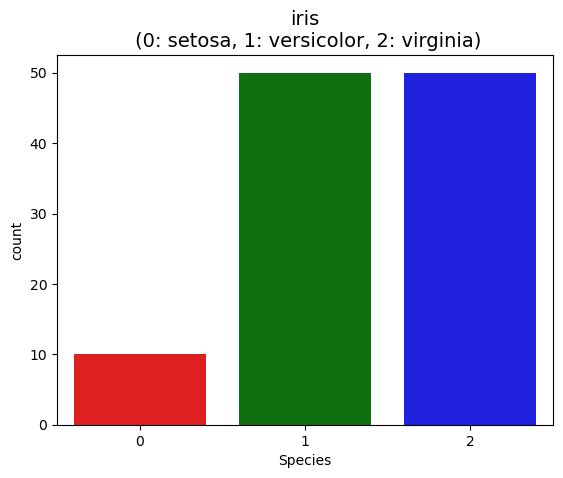

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']
sns.countplot('Species', data=df2, palette=colors)
plt.title('iris\n (0: setosa, 1: versicolor, 2: virginia)', fontsize=14)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Species, dtype: int64

In [10]:
#가중치
from sklearn.linear_model import LogisticRegression
# 기본옵션: 모든클래스에 1(가중치 없음)
logit1 = LogisticRegression(random_state=0) 

# balanced: 샘플수에 반비례하는 가중치가 곱해짐
logit2 = LogisticRegression(random_state=0, class_weight='balanced') 

# 가중치를 직접 입력(0: 3배의 가중치, 1: 가중치 없음, 2: 2배의 가중치)
logit3 = LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2})

In [11]:
#샘플수에 반비례하는 가중치값: n_samples / (n_classes * np.bincount (y))
import numpy as np
print(np.bincount(y))
print(88 / (3*np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [13]:
for logit in [logit1, logit2, logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print('학습용:', logit.score(X_train, y_train))
    print('검증용:', logit.score(X_test, y_test))
    print()

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

